In [90]:
# from _keys import db_user, db_password, db_name, db_host, db_port
# import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
# sql = """
# select t1.author, subreddit, to_timestamp(time_created)::date as post_created, account_created, t1.is_bot from
# 	(select *
# 	from (
# 		select author, title as submission, created_utm as time_created, subreddit, 'post' as submission_type, 'True' as is_bot
# 		from sus_user_posts
# 		where title !='This account is banned and is temporarily preserved for purposes of transparency.') as posts_aggregate
# 	union
# 	select *
# 	from (
# 		select author, title as submission, created_utm as time_created, subreddit, 'post' as submission_type, 'False' as is_bot
# 		from norm_user_posts) as norm_posts_aggregate)	as t1
# inner join (
# 	select *
# 	from (
# 		select sus_user_name as author, account_created as account_created, 'True' as is_bot
# 		from sus_users
# 	) as sus_users
# 	union
# 	select  *
# 	from (
# 		select norm_user_name as author, account_created as account_created, 'False' as is_bot
# 		from norm_users
# 	) as norm_users
# 	)as t2 on t1.author = t2.author
# where subreddit in ( 
# 		select subreddit
# 		from sus_user_posts
# 		inner join subreddit_info on sus_user_posts.subreddit = subreddit_info.subreddit_name
# 		where over18 = 'False'and subreddit not in ('u_reddit', 'funny', 'gifs', 'aww', 'AnimalsBeingBros', 'corgi', 'gif', 'cats', 'memes', 'pics', 'dogpictures', 'puppies', 'UpliftingNews', 'celebrities')
# 		group by subreddit
# 		order by count(*) desc
# 		limit 30)
# """

In [92]:
# conn = psycopg2.connect(dbname=db_name, user=db_user, password=db_password, host=db_host, port=db_port)
# cur = conn.cursor()

In [93]:
# df = pd.read_sql(sql, conn)
# df.to_csv('reddit_posts_adhoc_for_meta_pivot.csv', index=False)

In [94]:
df_pivoted = pd.read_csv('pivoted_bs.csv')

In [95]:
df_pivoted = df_pivoted.fillna(0)

In [96]:
#replace true with 1 and false with 0 in is_bot column
df_pivoted['is_bot'] = df_pivoted['is_bot'].replace(to_replace=[True, False], value=[1, 0])
df_pivoted.head()

,author,account_created,is_bot,AfricanAmerican,altnewz,AskReddit,Bad_Cop_No_Donut,Bitcoin,BlackLivesMatter,blackpower,...,occupywallstreet,police,Police_v_Video,PoliticalHumor,politics,racism,Republican,uncen,uspolitics,worldnews
0,_____----------_____,1422270570,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,______DEADPOOL______,1374769399,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,_____D34DP00L_____,1418606347,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,_____Deadpool,1425435601,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,_____goats,1425568888,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [98]:
X = df_pivoted.drop(['author', 'is_bot', 'account_created'], axis=1)
y = df_pivoted['is_bot']

In [99]:
def rf_regressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=6)
    reg = DecisionTreeClassifier(max_leaf_nodes=15, random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
    reg.fit(X_train, y_train)
    print(f'train: {reg.score(X_train, y_train)} test: {reg.score(X_test, y_test)}')
    plt.scatter(y_train, reg.predict(X_train), color='blue')
    plt.scatter(y_test, reg.predict(X_test), color='red')
    plt.show()
    print("--------------------")
    print(confusion_matrix(y_test, reg.predict(X_test), labels=[1,0]))
    print(classification_report(y_test, reg.predict(X_test), labels=[1,0]))
    print(f1_score(y_test, reg.predict(X_test), labels=[1,0]))
    return reg


In [100]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=6)
# for i in range(2,20,2):
#     # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=i)
#     # print(i)
#     # print(y_train.value_counts())
#     # print(y_test.value_counts())
#     reg = DecisionTreeClassifier(max_leaf_nodes=15, random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
#     reg.fit(X_train, y_train)
#     print(f'{i} depth----train: {reg.score(X_train, y_train)} test: {reg.score(X_test, y_test)}')
#     print(confusion_matrix(y_test, reg.predict(X_test), labels=[1,0]))

train: 0.991010235870049 test: 0.9927310488058152


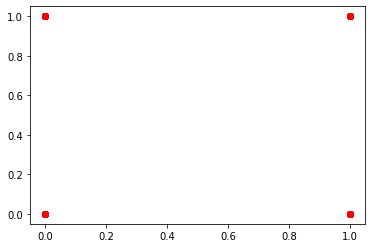

--------------------
[[  19   30]
 [   5 4761]]
              precision    recall  f1-score   support

           1       0.79      0.39      0.52        49
           0       0.99      1.00      1.00      4766

    accuracy                           0.99      4815
   macro avg       0.89      0.69      0.76      4815
weighted avg       0.99      0.99      0.99      4815

0.5205479452054794


In [101]:
reg = rf_regressor(X, y)

In [102]:
features_df = pd.DataFrame(zip(X.columns, reg.feature_importances_), columns=['feature', 'importance']).sort_values('importance', ascending=False)
features_df.head(20)

,feature,importance
23,PoliticalHumor,0.459197
3,Bad_Cop_No_Donut,0.305869
20,occupywallstreet,0.119081
18,MURICA,0.031117
8,conspiracy,0.029230
5,BlackLivesMatter,0.018635
6,blackpower,0.018501
17,lgbt,0.018371
26,Republican,0.000000
25,racism,0.000000


In [103]:
# import pickle
# descision_tree_model = pickle.dumps(reg)
# pickle.dump(descision_tree_model, open('descision_tree_model.pkl', 'wb'))
